# **TAREA 1** / Inteligencia Artificial por *Ignacio  Santiago Medina Díaz*

## Actividad 1 - Bnlearn & Exhaustivesearch & Hillclimbsearch


###Instalación de Libreria y preparar dataset

1. **Instalación libreria bnlearn**.

In [ ]:
pip install bnlearn

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.8 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


2. **Importación de bibliotecas** necesarias para la ejecición de esta actividad.

In [ ]:
import pandas as pd
import numpy as np
from bnlearn import structure_learning, parameter_learning, inference, plot, independence_test
import matplotlib.pyplot as plt
from tabulate import tabulate

3. **Carga y preprocesamiento de datos**: Aquí cargamos el conjunto de datos Adult de UCI, eliminamos las filas con valores faltantes, seleccionamos una muestra aleatoria de 10,000 filas y nos quedamos solo con las variables relevantes (esto ultimo se hace para que la ejecución de ExhaustiveSearch no se demore tanto).

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, names=column_names, na_values=" ?", skipinitialspace=True)

data = data.dropna().sample(n=10000, random_state=42)
selected_vars = ['age', 'education', 'marital-status', 'hours-per-week', 'income']
data_subset = data[selected_vars]

4. **Discretización y simplificación de categorías**: Se discretiza las variables numéricas y simplifica las categorías de educación y estado civil para reducir la complejidad del modelo.

In [ ]:
data_subset['age'] = pd.cut(data_subset['age'], bins=3, labels=['young', 'middle', 'old'])
data_subset['hours-per-week'] = pd.cut(data_subset['hours-per-week'], bins=3, labels=['low', 'medium', 'high'])

education_mapping = {
    'Preschool': 'Basic', '1st-4th': 'Basic', '5th-6th': 'Basic', '7th-8th': 'Basic', '9th': 'Basic',
    '10th': 'HighSchool', '11th': 'HighSchool', '12th': 'HighSchool', 'HS-grad': 'HighSchool',
    'Some-college': 'College', 'Assoc-voc': 'College', 'Assoc-acdm': 'College',
    'Bachelors': 'University', 'Masters': 'University', 'Doctorate': 'University'
}
data_subset['education'] = data_subset['education'].replace(education_mapping)

marital_mapping = {
    'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married', 'Married-AF-spouse': 'Married',
    'Divorced': 'NotMarried', 'Separated': 'NotMarried', 'Widowed': 'NotMarried', 'Never-married': 'NotMarried'
}
data_subset['marital-status'] = data_subset['marital-status'].replace(marital_mapping)

###Exhaustivesearch

5. **Exhaustivesearch**: Aquí realizamos el modelo de aprendizaje y visualizamos el resultado.

In [ ]:
ex_model = structure_learning.fit(data_subset, methodtype='ex', scoretype='bic')

plot(ex_model)
plt.show()

[bnlearn] >Computing best DAG using [ex]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn]> Nothing to plot because no edges are present between nodes. 


6. **Pruebas de independencia y poda para Búsqueda Exhaustiva**: Se realizo pruebas de independencia en el modelo, mostrando los resultados y luego podamos el modelo basándonos en estas pruebas.

[bnlearn] >Compute edge strength with [chi_square]

Resultados de la prueba de independencia para Búsqueda Exhaustiva (sin podar):
+----+----------------+----------------+-------------+--------------+--------------+-------+
|    | source         | target         | stat_test   |      p_value |   chi_square |   dof |
+====+================+================+=============+==============+==============+=======+
|  0 | education      | income         | True        | 3.75868e-257 |     1193.67  |     4 |
+----+----------------+----------------+-------------+--------------+--------------+-------+
|  1 | education      | marital-status | True        | 1.13851e-34  |      165.168 |     4 |
+----+----------------+----------------+-------------+--------------+--------------+-------+
|  2 | hours-per-week | age            | True        | 3.10873e-118 |      552.391 |     4 |
+----+----------------+----------------+-------------+--------------+--------------+-------+
|  3 | income         | age     

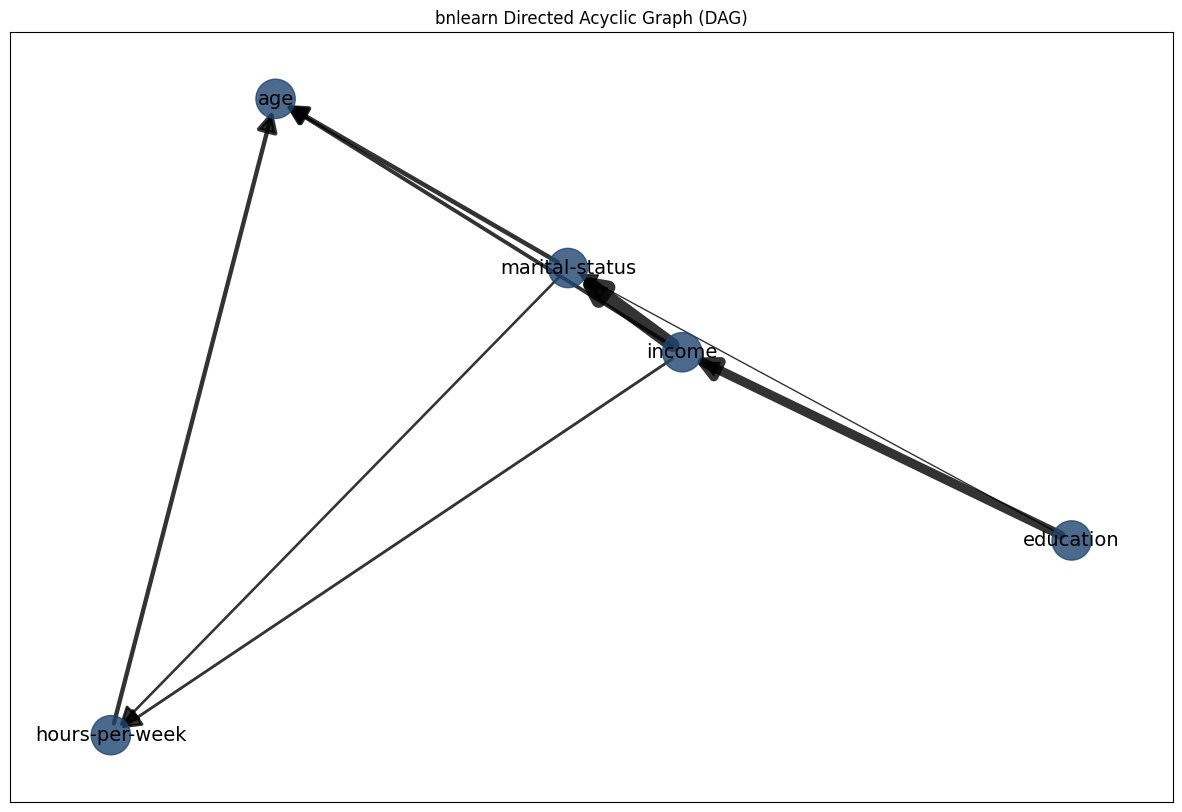

In [ ]:
ex_model_unpruned = independence_test(ex_model, data_subset, alpha=0.05, prune=False)
print("\nResultados de la prueba de independencia para Búsqueda Exhaustiva (sin podar):")
print(tabulate(ex_model_unpruned['independence_test'], headers="keys", tablefmt="grid"))

ex_model_pruned = independence_test(ex_model, data_subset, alpha=0.05, prune=True)
plot(ex_model_pruned)
#plt.title("Estructura de la red - Búsqueda Exhaustiva (Podada)")
plt.show()

7. **Aprendizaje de parámetros e inferencias para Búsqueda Exhaustiva**: Aprendemos los parámetros del modelo podado y realizamos dos inferencias diferentes.



In [ ]:
ex_model_params = parameter_learning.fit(ex_model_pruned, data_subset)
print("Aprendizaje de parámetros para Búsqueda Exhaustiva completado.")

ex_result_1 = inference.fit(ex_model_params, variables=['income'], evidence={'education': 'University'})
ex_result_2 = inference.fit(ex_model_params, variables=['hours-per-week'], evidence={'age': 'middle', 'marital-status': 'Married'})

print("\nResultados de las inferencias con Búsqueda Exhaustiva:")
print("Inferencia 1 (Probabilidad de ingresos dado educación universitaria):")
print(ex_result_1)
print("\nInferencia 2 (Probabilidad de horas de trabajo dado edad y estado civil):")
print(ex_result_2)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of education:
+------------------------+-----------+
| education(Basic)       | 0.0666364 |
+------------------------+-----------+
| education(College)     | 0.291364  |
+------------------------+-----------+
| education(HighSchool)  | 0.384909  |
+------------------------+-----------+
| education(Prof-school) | 0.0336364 |
+------------------------+-----------+
| education(University)  | 0.223455  |
+------------------------+-----------+
[bnlearn] >CPD of income:
+---------------+---------------------+-----+-----------------------+
| education     | education(Basic)    | ... | education(University) |
+---------------+---------------------+-----+-----------------------+
| income(<=50K) | 0.8308321964529332  | ... | 0.5366151342554922    |
+---------------+---------------------+---

###Hillclimbsearch

8. Los pasos de este modelo repiten el proceso de los pasos 5-7, pero utilizando el método HillClimbSearch en lugar de la Búsqueda Exhaustiva

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


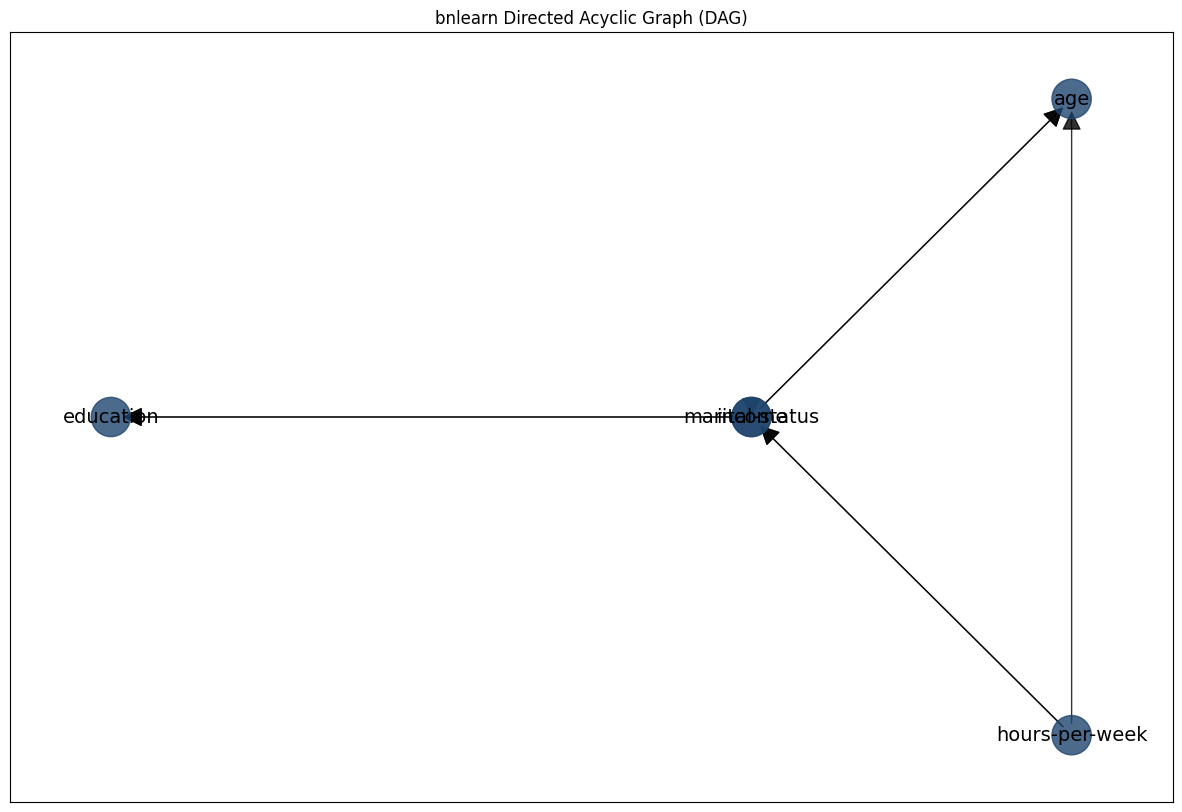

In [ ]:
hc_model = structure_learning.fit(data_subset, methodtype='hc', scoretype='bic')

plot(hc_model)
plt.show()

[bnlearn] >Compute edge strength with [chi_square]

Resultados de la prueba de independencia para HillClimbSearch (sin podar):
+----+----------------+----------------+-------------+--------------+--------------+-------+
|    | source         | target         | stat_test   |      p_value |   chi_square |   dof |
+====+================+================+=============+==============+==============+=======+
|  0 | marital-status | age            | True        | 1.55164e-123 |      565.557 |     2 |
+----+----------------+----------------+-------------+--------------+--------------+-------+
|  1 | marital-status | education      | True        | 1.13851e-34  |      165.168 |     4 |
+----+----------------+----------------+-------------+--------------+--------------+-------+
|  2 | hours-per-week | income         | True        | 1.08456e-75  |      345.225 |     2 |
+----+----------------+----------------+-------------+--------------+--------------+-------+
|  3 | hours-per-week | age         

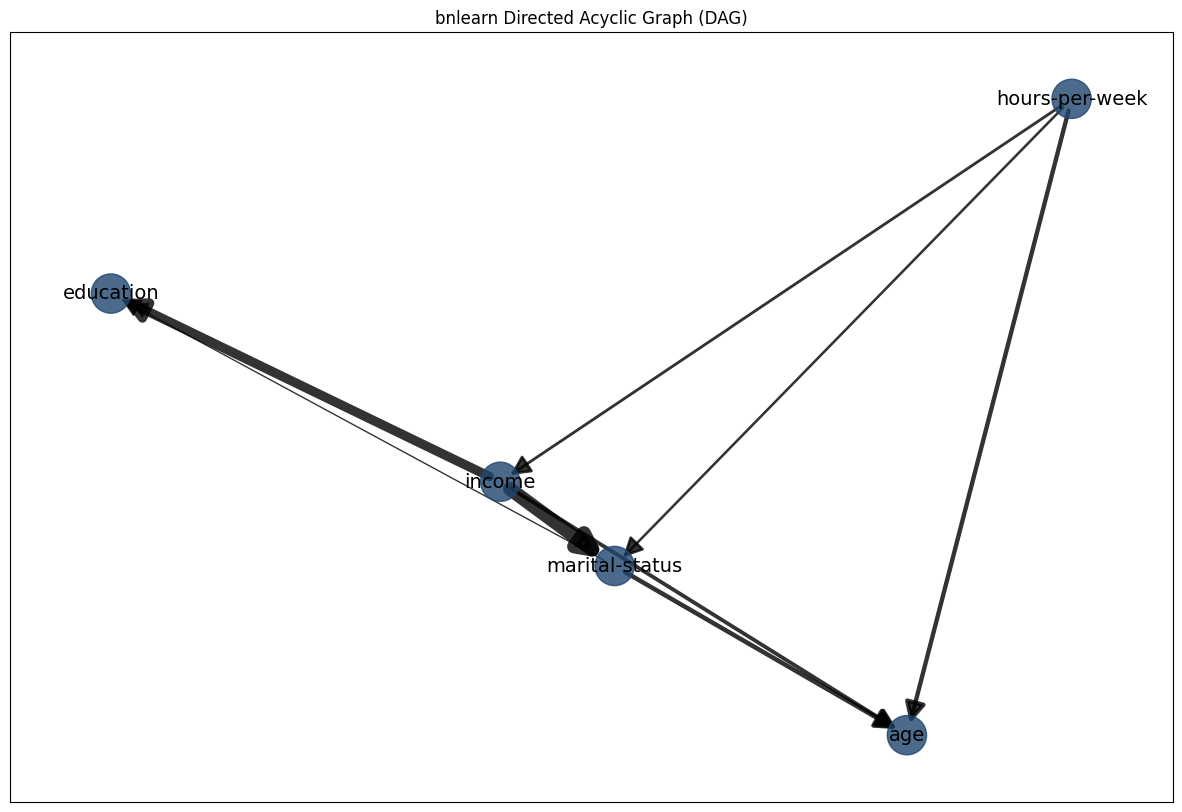

In [ ]:
# Realizar prueba de independencia sin podar
hc_model_unpruned = independence_test(hc_model, data_subset, alpha=0.05, prune=False)
print("\nResultados de la prueba de independencia para HillClimbSearch (sin podar):")
print(tabulate(hc_model_unpruned['independence_test'], headers="keys", tablefmt="grid"))

hc_model_pruned = independence_test(hc_model, data_subset, alpha=0.05, prune=True)
plot(hc_model_pruned)
#plt.title("Estructura de la red - HillClimbSearch (Podada)")
plt.show()

In [ ]:
# Aprender parámetros para el modelo podado
hc_model_params = parameter_learning.fit(hc_model_pruned, data_subset)
print("Aprendizaje de parámetros para HillClimbSearch completado.")

# Realizar inferencias
hc_result_1 = inference.fit(hc_model_params, variables=['income'], evidence={'education': 'University'})
hc_result_2 = inference.fit(hc_model_params, variables=['hours-per-week'], evidence={'age': 'middle', 'marital-status': 'Married'})

print("\nResultados de las inferencias con HillClimbSearch:")
print("Inferencia 1 (Probabilidad de ingresos dado educación universitaria):")
print(hc_result_1)
print("\nInferencia 2 (Probabilidad de horas de trabajo dado edad y estado civil):")
print(hc_result_2)

print("\nResultados de la prueba de independencia para HillClimbSearch (red podada):")
print(tabulate(hc_model_pruned['independence_test'], headers="keys", tablefmt="grid"))


[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of marital-status:
+----------------------------+-----+------------------------+
| hours-per-week             | ... | hours-per-week(medium) |
+----------------------------+-----+------------------------+
| income                     | ... | income(>50K)           |
+----------------------------+-----+------------------------+
| marital-status(Married)    | ... | 0.8250885896527286     |
+----------------------------+-----+------------------------+
| marital-status(NotMarried) | ... | 0.17491141034727145    |
+----------------------------+-----+------------------------+
[bnlearn] >CPD of age:
+----------------+-------------------------+-----+----------------------------+
| hours-per-week | hours-per-week(high)    | ... | hours-per-week(medium)     |
+----------------+-------------

###Comparación de resultados

9. Finalmente, comparamos los resultados de ambos métodos, mostrando las inferencias lado a lado y visualizando las estructuras de red finales para ambos métodos en una sola figura.


Comparación de resultados:
HillClimbSearch - Inferencia 1:
+---------------+---------------+
| income        |   phi(income) |
+===============+===============+
| income(<=50K) |        0.5366 |
+---------------+---------------+
| income(>50K)  |        0.4634 |
+---------------+---------------+
Búsqueda Exhaustiva - Inferencia 1:
+---------------+---------------+
| income        |   phi(income) |
+===============+===============+
| income(<=50K) |        0.5366 |
+---------------+---------------+
| income(>50K)  |        0.4634 |
+---------------+---------------+

HillClimbSearch - Inferencia 2:
+------------------------+-----------------------+
| hours-per-week         |   phi(hours-per-week) |
+========================+=======================+
| hours-per-week(high)   |                0.0552 |
+------------------------+-----------------------+
| hours-per-week(low)    |                0.1123 |
+------------------------+-----------------------+
| hours-per-week(medium) |            

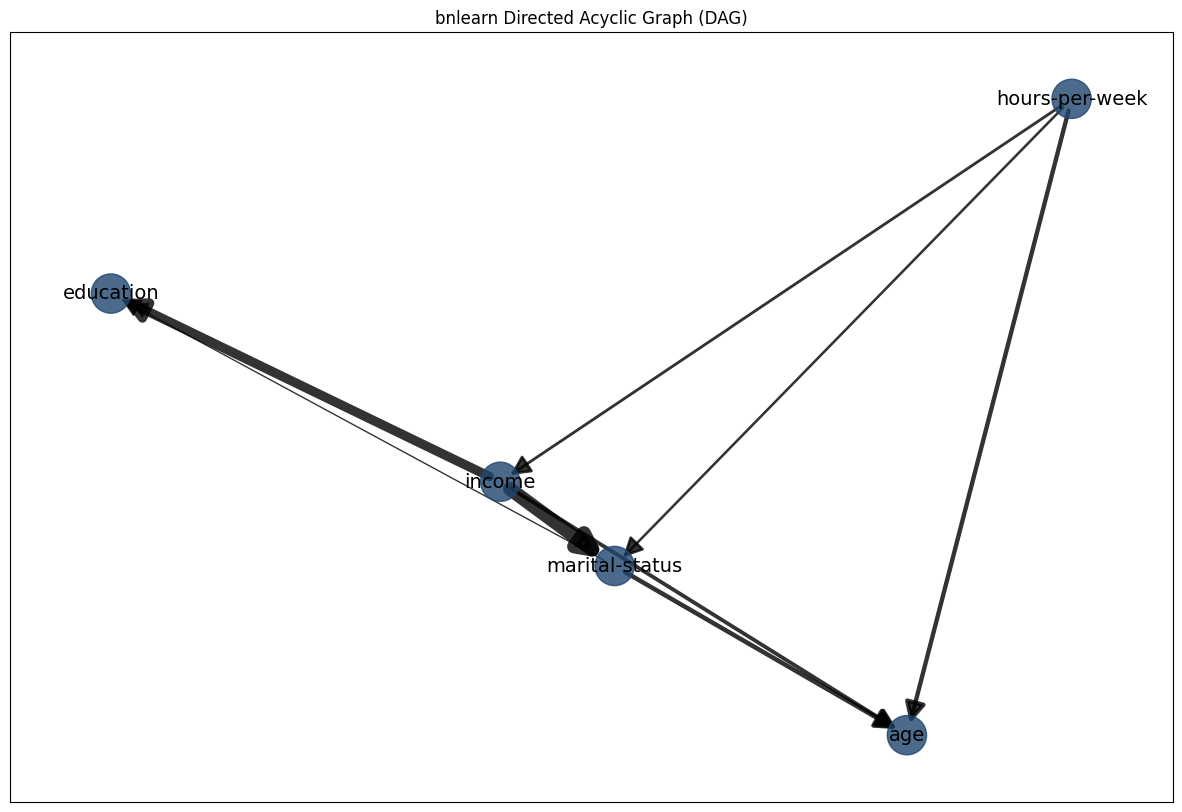

Estructura final - HillClimbSearch
[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Converting source-target into adjacency matrix..
[bnlearn] >Making the matrix symmetric..
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


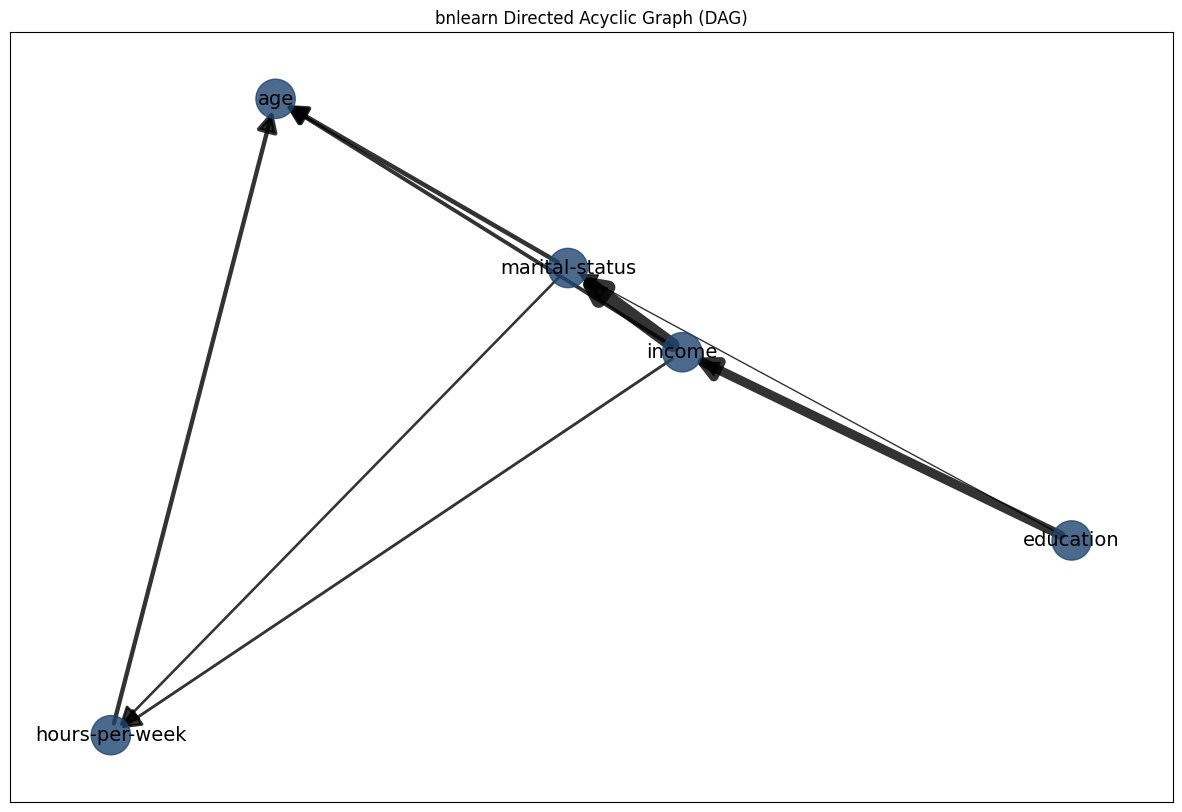

Estructura final - Búsqueda Exhaustiva


<Figure size 640x480 with 0 Axes>

In [ ]:
print("\nComparación de resultados:")
print("HillClimbSearch - Inferencia 1:")
print(hc_result_1)
print("Búsqueda Exhaustiva - Inferencia 1:")
print(ex_result_1)
print("\nHillClimbSearch - Inferencia 2:")
print(hc_result_2)
print("Búsqueda Exhaustiva - Inferencia 2:")
print(ex_result_2)


plot(hc_model_pruned)
print("Estructura final - HillClimbSearch")
plot(ex_model_pruned)
print("Estructura final - Búsqueda Exhaustiva")
plt.tight_layout()
plt.show()

###Análisis

Respecto a las comparaciones de resultados se puede realizar el siguiente análisis:
- Ambos métodos producen resultados idénticos para las dos inferencias, esto puede suceder especialmente en conjuntos de datos pequeños o con relaciones fuertes entre variables.
- Se observa una ligera tendencia hacia ingresos <=50K y una fuerte tendencia hacia horas de trabajo semanales "medium".
- La consistencia perfecta entre métodos sugiere relaciones muy robustas en los datos, con un conjunto de datos lo suficientemente grande y representativo, ambos métodos pueden capturar las mismas dependencias fundamentales entre las variables.
- Se recomienda usar HillClimbSearch por su probable mayor eficiencia computacional, dado que produce los mismos resultados que la Búsqueda Exhaustiva.

En conclusión, **ambos** métodos, HillClimbSearch y Búsqueda Exhaustiva, han producido resultados idénticos para las dos inferencias analizadas. Las relaciones descubiertas en los datos parecen ser muy robustas y claras, dado que métodos con enfoques diferentes llegan a las mismas conclusiones. (Se recomienda realizar más experimentos con diferentes conjuntos de datos y parámetros para verificar si esta consistencia perfecta se mantiene en otras situaciones.)

Por otro lado, para este conjunto de datos específico, HillClimbSearch podría ser preferible debido a su probable mayor eficiencia computacional (su ejecución es más rapida), dado que produce los mismos resultados que la Búsqueda Exhaustiva (esta ejecución es muy lenta a diferencia de la anterior).



##Actividad 2 - Profesor Metalero & RandomWalk


###a) RandomWalk

1. Creamos la matríz de transición con los grupos musicales.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

P = np.array([
    [0.25, 0.06, 0.08, 0.15, 0.04, 0.02, 0.15, 0.15, 0.10],
    [0.15, 0.15, 0.10, 0.22, 0.01, 0.02, 0.15, 0.10, 0.10],
    [0.12, 0.00, 0.05, 0.24, 0.14, 0.04, 0.27, 0.07, 0.07],
    [0.05, 0.13, 0.05, 0.30, 0.10, 0.10, 0.22, 0.05, 0.00],
    [0.18, 0.20, 0.07, 0.20, 0.15, 0.05, 0.05, 0.05, 0.05],
    [0.20, 0.10, 0.20, 0.05, 0.05, 0.10, 0.02, 0.15, 0.13],
    [0.01, 0.05, 0.15, 0.14, 0.17, 0.10, 0.12, 0.10, 0.16],
    [0.17, 0.15, 0.07, 0.07, 0.15, 0.10, 0.12, 0.09, 0.08],
    [0.13, 0.11, 0.13, 0.03, 0.20, 0.20, 0.04, 0.15, 0.01]
])

groups = ['Helloween', 'Hammerfall', 'Stratovarius', 'Rhapsody of Fire',
          'Yngwie Malmsteen', 'Liquid Tension Experiment', 'Blind Guardian',
          'Dream Theater', 'Symphony X']

2. Procedemos a la creación de la función RandomWalk

In [ ]:
def random_walk(start_state, epsilon, max_steps=100000, window_size=1000):
    current_state = start_state
    states = [current_state]
    probabilities = [[0] * 9 for _ in range(max_steps)]
    probabilities[0][start_state] = 1

    for step in range(1, max_steps):
        next_state = np.random.choice(9, p=P[current_state])
        states.append(next_state)
        current_state = next_state

        # Calcular probabilidades actuales
        for i in range(9):
            probabilities[step][i] = states.count(i) / (step + 1)

        # Verificar convergencia
        if step > window_size:
            window_probs = np.array([states[step-window_size:step].count(i) / window_size for i in range(9)])
            current_probs = np.array(probabilities[step])
            if np.all(np.abs(current_probs - window_probs) < epsilon):
                print(f"Convergencia alcanzada en el paso {step}")
                return probabilities[:step+1]

    print("Máximo número de pasos alcanzado sin convergencia")
    return probabilities

3. Configuración de parámetros y ejecución del randomwalk.

In [ ]:
# Parámetros
start_state = 4  # Yngwie Malmsteen
epsilon = 0.001  # Parámetro de convergencia

# Realizar random walk
probabilities = random_walk(start_state, epsilon)

Convergencia alcanzada en el paso 1001


4. Visualización de resultados.

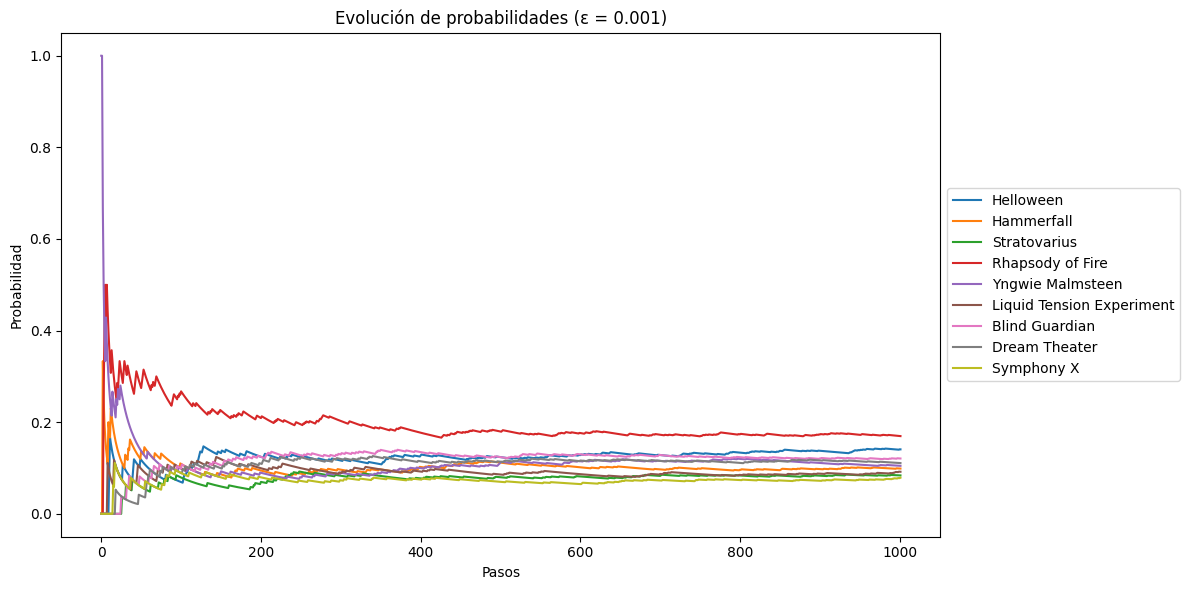

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(9):
    plt.plot(range(len(probabilities)), [p[i] for p in probabilities], label=groups[i])
plt.xlabel('Pasos')
plt.ylabel('Probabilidad')
plt.title(f'Evolución de probabilidades (ε = {epsilon})')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

5. Analisis de los resultados.

In [ ]:
final_probs = probabilities[-1]
print("\nProbabilidades finales:")
for i, prob in enumerate(final_probs):
    print(f"{groups[i]}: {prob:.4f}")


Probabilidades finales:
Helloween: 0.1407
Hammerfall: 0.0988
Stratovarius: 0.0838
Rhapsody of Fire: 0.1697
Yngwie Malmsteen: 0.1048
Liquid Tension Experiment: 0.0918
Blind Guardian: 0.1208
Dream Theater: 0.1108
Symphony X: 0.0788


- Respecto a las probabilidades finales dada la convergencia de los datos, se aprecia que Rhapsody of Fire tiene la probabilidad más alta, coincidiendo con la línea roja que termina en la parte superior.
- Mientras que Symphony X y Stratovarius tienen las probabilidades más bajas, lo cual también se refleja en el gráfico donde sus líneas terminan en la parte inferior.
- La convergencia de datos se realizo con 1000 pasos, pero en el grafíco se observa que se  estabiliza alrededor de los 400-600 pasos, donde se puede reflejar en estas probabilidades finales.


###b) Distribución estacionaria de la cadena de Markov,

1. Cálculo de la distribución estacionaria analítica.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(P.T)
stationary = eigenvectors[:, np.isclose(eigenvalues, 1)].real
stationary = stationary / np.sum(stationary)
stationary = stationary.flatten()

2. Comparación de resultados.

In [ ]:
print("\nComparación con la distribución estacionaria analítica:")
for i in range(9):
    print(f"{groups[i]}: Random Walk: {final_probs[i]:.4f}, Analítica: {stationary[i]:.4f}, Diferencia: {abs(final_probs[i] - stationary[i]):.4f}")


Comparación con la distribución estacionaria analítica:
Helloween: Random Walk: 0.1407, Analítica: 0.1316, Diferencia: 0.0091
Hammerfall: Random Walk: 0.0988, Analítica: 0.1054, Diferencia: 0.0066
Stratovarius: Random Walk: 0.0838, Analítica: 0.0948, Diferencia: 0.0109
Rhapsody of Fire: Random Walk: 0.1697, Analítica: 0.1711, Diferencia: 0.0014
Yngwie Malmsteen: Random Walk: 0.1048, Analítica: 0.1101, Diferencia: 0.0053
Liquid Tension Experiment: Random Walk: 0.0918, Analítica: 0.0775, Diferencia: 0.0143
Blind Guardian: Random Walk: 0.1208, Analítica: 0.1369, Diferencia: 0.0161
Dream Theater: Random Walk: 0.1108, Analítica: 0.0964, Diferencia: 0.0144
Symphony X: Random Walk: 0.0788, Analítica: 0.0763, Diferencia: 0.0026


Ahora podemos realizar un análisis más profundo comparando los resultados de la simulación del **Random Walk** con la **distribución estacionaria analítica**. Esta comparación nos permite validar la precisión de la simulación y obtener insights adicionales.

- La solución analítica representa el verdadero estado estacionario a largo plazo, mientras que la simulación es una aproximación basada en un número finito de pasos.

- Ranking de bandas según la distribución estacionaria analítica:
  1. Rhapsody of Fire (0.1711)
  2. Blind Guardian (0.1369)
  3. Helloween (0.1316)
  4. Yngwie Malmsteen (0.1101)
  5. Hammerfall (0.1054)
  6. Dream Theater (0.0964)
  7. Stratovarius (0.0948)
  8. Liquid Tension Experiment (0.0775)
  9. Symphony X (0.0763)

- Con respecto a la precisión de la simulación:
  - La mayoría de las diferencias entre la simulación y la solución analítica son pequeñas (menores a 0.01), lo que indica una buena precisión. Mientras que la diferencia más pequeña es para Rhapsody of Fire (0.0014), lo que sugiere que la simulación fue particularmente precisa para esta banda, y mantiene su posición como la banda más probable de ser escuchada en ambos métodos, mientras que Symphony X sigue siendo la banda menos probable en ambos métodos, con una diferencia mínima entre la simulación y la solución analítica.

## Actividad 3 - HMM (Satisfecho e Insatisfecho)

1. Antes de comenzar, se instalará la libreria hmmlearn para poder trabajar con el Algoritmo Viterbi y HMM.

In [ ]:
pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.6 MB/s eta 0:00:00


2. Importaciones de numpy para operaciones numericas y hmmlearn para trabajar con Modelos Ocultos de Markov (ya antes instalada).

In [ ]:
import numpy as np
from hmmlearn import hmm



> ***Anotación***: Utilizaremos el siguiente caso visto en clases para poder realizar la actividad.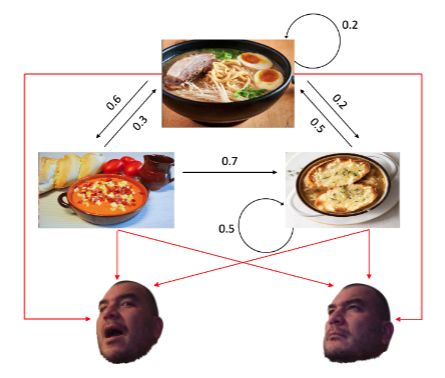




3. Dado el caso de la imagen que muestra los estados ocultos y las observaciones de una manera visual, se procede a definir los estados ocultos (sopas) y la observaciones en el código de python.
  - ***n_states*** = 3: Define que tenemos 3 estados oculto (en este caso, 3 tipos de sopa).
  - ***n_observations*** = 2: Define que tenemos dos posibles observaciones: satisfecho (0) e insatisfecho (1).

In [ ]:
# Definir los estados ocultos (sopas) y observaciones
n_states = 3
n_observations = 2

4. Se creara la tabla de probabilidades de transición de los estados, que muestra la probabilidad de pasar de un estado a otro.

In [ ]:
transition_probability = np.array([
    [0.2, 0.6, 0.2],
    [0.3, 0, 0.7],
    [0.5, 0, 0.5]
])



> Un ejemplo de la matríz anterior: Si el estado actual es el 0 (Sopa 0), la probabilidad de moverse al estado 1 (Sopa 1) es 0.6.



5. Creación de la matriz de emisión que representa la probabilidad de cada observación (satisfecho/insatisfecho) para cada estado (tipo de sopa).



In [ ]:
emission_probability = np.array([
    [0.8, 0.2],  # Sopa 0: Prob. de estar satisfecho/insatisfecho
    [0.3, 0.7],  # Sopa 1: Prob. de estar satisfecho/insatisfecho
    [0.6, 0.4]   # Sopa 2: Prob. de estar satisfecho/insatisfecho
])



> Cabe destacar lo siguiente:
  - Sopa 0 => Ramen
  - Sopa 1 => Salmonejo
  - Sopa 2 => Cebolla



6. Se procede a la creación del modelo HMM y con las configuraciones de sus parámetros.

In [ ]:
# Crear el modelo HMM multinomial
model = hmm.MultinomialHMM(n_components=n_states, n_trials=1)  # Agregar n_trials=1

# Definir las probabilidades iniciales de los estados
model.startprob_ = np.array([1/3, 1/3, 1/3])  # Probabilidad inicial uniforme
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


> Aquí se crea el modelo HMM con 3 estados (las sopas) y se establece n_trials=1, lo que indica que cada observación representa un solo intento (una comida).

> Y se define lo siguiente:
  - ***Probabilidades iniciales***: Cada sopa tiene una probabilidad inicial uniforme del 33.33%.
  - ***Matriz de transición***: Define cómo cambian los estados de un día a otro.
  - ***Matriz de emisión***: Define las probabilidades de que la persona esté satisfecha o insatisfecha para cada tipo de sopa.

7. Se definen las secuencias de observaciones.

In [ ]:
observations = np.array([[1, 0],  # Día 1: Satisfecho
                         [0, 1],  # Día 2: Insatisfecho
                         [0, 1],  # Día 3: Insatisfecho
                         [1, 0],  # Día 4: Satisfecho
                         [0, 1],  # Día 5: Insatisfecho
                         [0, 1],  # Día 6: Insatisfecho
                         [0, 1],  # Día 7: Insatisfecho
                         [0, 1],  # Día 8: Insatisfecho
                         [1, 0]]) # Día 9: Satisfecho

>Esta es la secuencia de observaciones que indica si la persona estuvo satisfecha o insatisfecha después de cada comida (día). Cada fila es un día y cada valor es una cuenta de los resultados:
  - [1, 0]: Satisfecho (1 vez satisfecho, 0 veces insatisfecho).
  - [0, 1]: Insatisfecho (0 veces satisfecho, 1 vez insatisfecho).

8. Cálculamos la secuencia de estados más probables utilizando el algoritmo **VITERBI** dados los resultados observados (satisfacción o insatisfacción).

In [ ]:
logprob, state_sequence = model.decode(observations, algorithm="viterbi")


9. Imprimimos la secuencia de estados más probable.

In [ ]:
print("---------------------------------------------------------------")
print(f"Secuencia de estados más probable: {state_sequence}")
print("---------------------------------------------------------------")
if state_sequence[4] == 0:
    print("Estado más probable para q5: Ramen")
elif state_sequence[4] == 1:
    print("Estado más probable para q5: Salmonejo")
else:
    print("Estado más probable para q5: Cebolla")
print("---------------------------------------------------------------")


---------------------------------------------------------------
Secuencia de estados más probable: [0 1 2 0 1 2 0 1 2]
---------------------------------------------------------------
Estado más probable para q5: Salmonejo
---------------------------------------------------------------


>Tal como se aprecia en el output, este código imprime la secuencia de estados (tipos de sopa) más probable y también el estado más probable para el día 5 (q5)



10. Calcular las probabilidades de los estados en cada paso.

In [ ]:
state_probabilities = model.predict_proba(observations)
print(f"\nProbabilidades de los estados en q5: {state_probabilities[4]}")



Probabilidades de los estados en q5: [0.22484363 0.4653944  0.30976197]




> Como se aprecia, aquí calculamos la probabilidad de estar en cada estado (tipo de sopa) para cada día y mostramos la probabilidad del día 5 (q5).



In [ ]:
max_prob_state_q5 = np.argmax(state_probabilities[4])
print("------------------------------------------")
print(f"Estado con mayor probabilidad en q5: {max_prob_state_q5}")
print("------------------------------------------")
if max_prob_state_q5 == 0:
    print("El estado es la Sopa de Ramen")
elif max_prob_state_q5 == 1:
    print("El estado es la Sopa de Salmonejo")
else:
    print("El estado oculto es la Sopa de Cebolla")

print("------------------------------------------")

------------------------------------------
Estado con mayor probabilidad en q5: 1
------------------------------------------
El estado es la Sopa de Salmonejo
------------------------------------------


Se puede concluir que el estado mas probable para q5 es la ***sopa de Sarmonejo con un 0.4653944*** con mayor probabilidad que el Ramen y la sopa de Cebolla, tal como se muestra en el output.